### Objectifs de l'analyse


Soit la fonction $f(x,y) = (x-3)^{2}(x-1)^{2}-(y-1)^{2}$ et $\mathcal{D}_R$ le disque de centre $(1,1)$ et de rayon $R$


1) Déterminer les points critiques de $f$ et leurs natures

2) Déterminer le maximum de $f$ dans $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$, en fonction du paramètre $R > 0$

In [1]:
import numpy as np
import sympy as sym
from IPython.display import display
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interactive
import ipywidgets

In [2]:
plt.rc('figure',figsize=(13,7))

In [3]:
x,y,R,L=sym.symbols('x y R L', real=True)

In [4]:
sym.init_printing()

**Partie 1** : Optimisation libre

On commence par rechercher le(s) point(s) critique(s) de la fonction $f$ sans imposer de contrainte. On définit une fonction 'opti_libre'.

In [5]:
def opti_libre(f):
    """Fonction qui retourne le gradient, la hessienne,
    le(s) pc(s) et la hessienne évaluée au(x) pc(s) 
    d'une fontion à deux variables"""
    gradf=sym.Matrix([[f.diff(x)],[f.diff(y)]])
    fxx=f.diff(x,x)
    fxy=f.diff(x,y)
    fyy=f.diff(y,y)
    Liste_pc=sym.solve(gradf,x,y)
    H=sym.Matrix([[fxx,fxy],[fxy,fyy]])
    Hestimates=[]
    for pc in Liste_pc:
        Hestimates.append(H.subs({x:pc[0],y:pc[1]}))
    return gradf,H,Liste_pc,Hestimates

In [6]:
f=(x-3)**2*(x-1)**2-(y-1)**2

In [7]:
display(f)

In [8]:
opti_libre(f)

⎛⎡       2                    2          ⎤  ⎡  ⎛       2                      
⎜⎢(x - 3) ⋅(2⋅x - 2) + (x - 1) ⋅(2⋅x - 6)⎥  ⎢2⋅⎝(x - 3)  + 4⋅(x - 3)⋅(x - 1) +
⎜⎢                                       ⎥, ⎢                                 
⎝⎣                2 - 2⋅y                ⎦  ⎣                     0           

        2⎞    ⎤                                                        ⎞
 (x - 1) ⎠  0 ⎥                            ⎡⎡8  0 ⎤  ⎡-4  0 ⎤  ⎡8  0 ⎤⎤⎟
              ⎥, [(1, 1), (2, 1), (3, 1)], ⎢⎢     ⎥, ⎢      ⎥, ⎢     ⎥⎥⎟
            -2⎦                            ⎣⎣0  -2⎦  ⎣0   -2⎦  ⎣0  -2⎦⎦⎠

La fonction $f$ admet 3 points critiques. Etudions leur nature, on s'intéresse pour l'instant au cas local.

In [9]:
def liste_mineurs(A):
    """Fonction qui calcule les n mineurs diagonaux principaux d'une matrice de taille n*p'"""
    L=[]
    n,p=A.shape
    for k in range(1,n+1):
        Ak=A[0:k,0:k]
        L.append(sym.det(Ak))
    return L

In [10]:
def nature(A):
    """Nature du/des pc(s) trouvé(s) selon le signe de la matrice hessienne
    évaluée en ce/ces pc(s)"""
    n,p=A.shape
    mineurs=np.array(liste_mineurs(A))
    if (mineurs>0).all():
        texte="Le point critique est un minimum local"
        return 1,texte
    elif ((mineurs*np.array([(-1)**k for k in range(1,1+n)]))>0).all():
        texte="Le point critique est un maximum local"
        return -1,texte
    ###################################################
    #####QUELQUES CONDITIONS POUR LES POINTS SELLES####
    ###################################################
    ## 1) si tous les mineur principaux sont non nul##
    ## et qu'aucune des situations précédente n'est ##
    ## vraie, alors A est indéfinie                 ## 
    elif (mineurs!=0).all():
        texte="Le point critique est un point selle"
        return 0,texte
    ## 2) si un mineur d'ordre pair est négatif     ##
    ##  alors A est indéfinie                       ##
    ## (attention, en python la numérotation commence à 0)  ## 
    elif (mineurs[1::2]<0).any():
        texte="Le point critique est un point selle"
        return 0,texte
    ## 3) si on peut trouver deux mineurs d'ordre impaire de signes contraires   ##
    ##  alors A est indéfinie                       ##
    elif ((mineurs[::2]>0).any() and (mineurs[::2]<0).any()):
        texte="Le point critique est un point selle"
        return 0,texte
    ######Dans les autres cas on ne sait pas conclure##
    else :
        texte="On ne conclue pas"
        return None,texte

In [11]:
def resume(f):
    """Création d'un dictionnaire retournant le(s) pc(s) de la fonction
    et leur nature"""
    Gradf, Hf, pc, Hf_pc = opti_libre(f)
    res = {'pc' : opti_libre(f)[2],
              'nature pc' : [nature(opti_libre(f)[3][i]) for i in range(len(opti_libre(f)[3]))]}
    return res

In [12]:
resume(f)

{'pc': [(1, 1), (2, 1), (3, 1)],
 'nature pc': [(0, 'Le point critique est un point selle'),
  (-1, 'Le point critique est un maximum local'),
  (0, 'Le point critique est un point selle')]}

In [13]:
maxi=opti_libre(f)[2][1]
display(f.subs({x:maxi[0],y:maxi[1]}))

En optimisation libre, la fonction $f$ admet donc deux points selles et **un maximum local atteint en $(2,1)$** avec $f(2,1) = 1$.

Etudions maintenant si le maximum local est global. Pour cela, on doit déterminer si la hessienne $H_f(x,y)$ est définie négative $\forall (x,y) \in \mathrm{R^{2}}$.

In [14]:
H=opti_libre(f)[1]
display(H)

⎡  ⎛       2                              2⎞    ⎤
⎢2⋅⎝(x - 3)  + 4⋅(x - 3)⋅(x - 1) + (x - 1) ⎠  0 ⎥
⎢                                               ⎥
⎣                     0                       -2⎦

Les mineurs de la hessienne en tout point sont deux polynomes du second degré, ce qui implique que leurs signes changent selon les valeurs prises par $x$. On ne peut donc pas conclure quant au signe de $H_f(x,y)$.

Text(0.5, 1.0, '$(x-3)**2*(x-1)**2-(y-1)**2$')

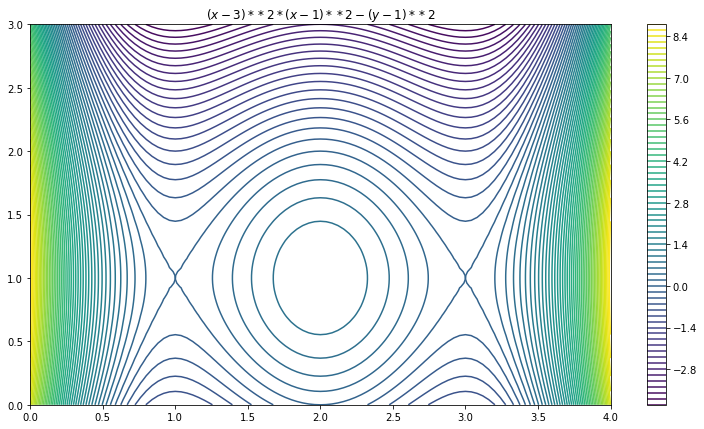

In [15]:
## Courbes de niveau de la fonction f ##
x=np.linspace(0, 4.0, 101)
y=np.linspace(0, 3.0, 101)
xx, yy = np.meshgrid(x,y)
zz=(xx-3)**2*(xx-1)**2-(yy-1)**2
plt.contour(xx, yy, zz,  np.arange(zz.min(), zz.max(), 0.2))
plt.colorbar()

plt.title('$(x-3)**2*(x-1)**2-(y-1)**2$')

Text(0.5, 0.92, 'Visualisation locale de f')

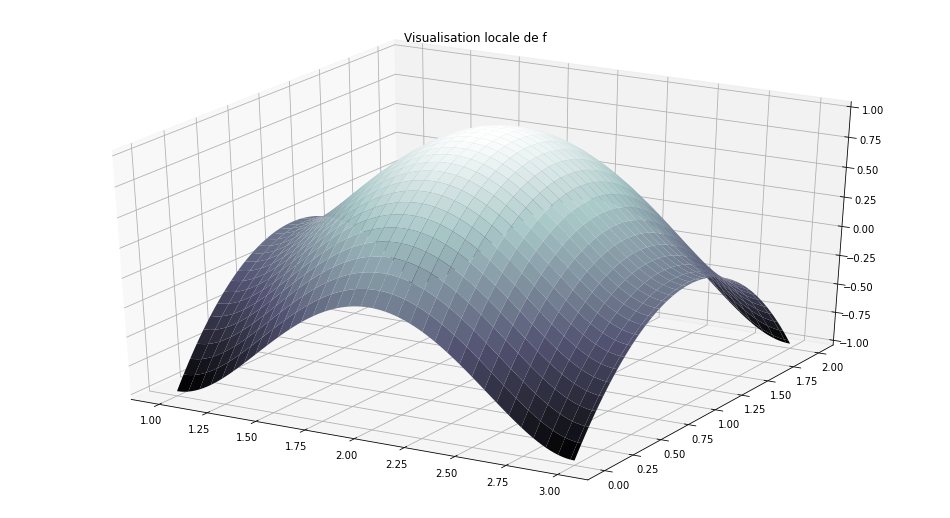

In [16]:
x=np.linspace(1., 3, 101)
y=np.linspace(0, 2, 101)
xx, yy = np.meshgrid(x,y)
zz=(xx-3)**2*(xx-1)**2-(yy-1)**2
fig = plt.figure()
ax = Axes3D(fig)
surf=ax.plot_surface(xx, yy, zz, cmap=plt.cm.bone)

plt.title('Visualisation locale de f')

Text(0.5, 0.92, 'Visualisation globale de f')

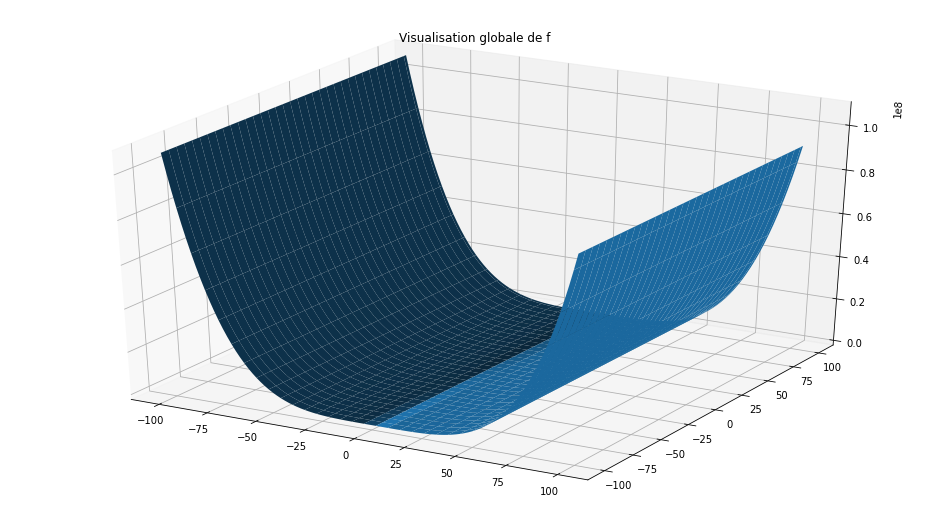

In [17]:
x=np.linspace(-100,100, 101)
y=np.linspace(-100,100, 101)
xx, yy = np.meshgrid(x,y)
zz=(xx-3)**2*(xx-1)**2-(yy-1)**2
fig = plt.figure()
ax = Axes3D(fig)
surf=ax.plot_surface(xx, yy, zz)
plt.title('Visualisation globale de f')

**Partie 2** : Optimisation sous contrainte 

On cherche à résoudre le programme de maximisation suivant :

\begin{align}
\max_{x,y} &\quad f(x,y) = (x-3)^{2}(x-1)^{2}-(y-1)^{2} \\
s.c.\qquad &\quad (x-1)^{2} + (y-1)^{2} \leq R^{2}
\end{align}

On définit le Lagrangien tel que :
$$\mathcal{L}(x,y;\lambda) = (x-3)^{2}(x-1)^{2}-(y-1)^{2} - \lambda \big[(x-1)^{2} + (y-1)^{2} - R^{2}\big]$$

La Jacobienne de la contrainte est :

$$J(x,y)=\Big(2(x-1) \ \ 2(y-1) \Big)$$

En notant $r$ le nombre de contraintes saturées, on a $rg\Big(J(x,y)\Big)=r=1$ à condition que $x\neq 1$ ou $y \neq 1$. 

Or, $x=1$ et $y=1 \Rightarrow (x-1)^{2} + (y-1)^{2} = 0$ ; ce qui est impossible puisque $R>0$.

Ainsi, si la contrainte est saturée alors $rg\Big(J(x,y)\Big)=r=1$.

La CQND est donc vérifiée.

In [18]:
x,y,R,L=sym.symbols('x y R L', real=True)

In [19]:
l=(x-3)**2*(x-1)**2-(y-1)**2-L*((x-1)**2+(y-1)**2-R**2)

In [20]:
display(l)

In [21]:
def gradient_lagrangien(f):
    """Fonction qui retourne le gradient et
    le(s) pc(s) du lagrangien"""
    X=sym.symbols('x y L', real=True)
    liste_grad=[]##liste du gradient initiale
    ##Boucle sur la premiere variable##
    for var1 in X:
        liste_grad.append(f.diff(var1))
    gradf=sym.Matrix(liste_grad)
    Liste_pc=sym.solve(gradf,X)##dict=True force un output en liste
    return gradf,Liste_pc

# pb : comment écrire proprement les conditions de Khun-Tucker
# j'ai essayé liste_grad.append(f.diff(var1)*var1) pour traiter les cas contrainte saturée/non saturée
# et les cas où l'une des variables x,y est nulle
# le code tourne mais ne s'arrête pas, ce qui ne permet pas d'obtenir un résultat

In [22]:
gradient_lagrangien(l)

⎛⎡                      2                    2          ⎤                     
⎜⎢-L⋅(2⋅x - 2) + (x - 3) ⋅(2⋅x - 2) + (x - 1) ⋅(2⋅x - 6)⎥                     
⎜⎢                                                      ⎥  ⎡                  
⎜⎢                -L⋅(2⋅y - 2) - 2⋅y + 2                ⎥, ⎣(1, 1 - R, -1), (1
⎜⎢                                                      ⎥                     
⎜⎢                2          2          2               ⎥                     
⎝⎣               R  - (x - 1)  - (y - 1)                ⎦                     

                                                                     ⎞
                                                                     ⎟
              ⎛             2          ⎞  ⎛             2          ⎞⎤⎟
, R + 1, -1), ⎝1 - R, 1, 2⋅R  + 6⋅R + 4⎠, ⎝R + 1, 1, 2⋅R  - 6⋅R + 4⎠⎦⎟
                                                                     ⎟
                                                                     ⎟
                    

In [23]:
def hessienne_lagrangien(f):
    """Fonction qui calcule la hessienne du lagrangien 
    pour tout x,y et les hessiennes évaluées à chaque pc"""
    X=sym.symbols('x y', real=True)
    Liste_pc=gradient_lagrangien(f)[1]
    liste_H=[]##listede la hessienne initiale
    ##Boucle sur la premiere variable##
    for var1 in X:
        Hx=[]
        ##boucle sur la seconde variable pour calculer la hessienne##
        for var2 in X:
            Hx.append(f.diff(var1,var2))
        liste_H.append(Hx)   
    H=sym.Matrix(liste_H)
    Hestimates=[]
    for pc in Liste_pc:
        Hestimates.append(H.subs({x:pc[0],y:pc[1],L:pc[2]}))
    return H,Hestimates

In [24]:
def jacobienne(f):
    X=sym.symbols('x y', real=True)
    Liste_pc=gradient_lagrangien(l)[1]
    J=[]
    for var1 in X:
        J.append(f.diff(var1))
    J=sym.Matrix(J).T
    Jestimates=[]
    for pc in Liste_pc:
        Jestimates.append(J.subs({x:pc[0],y:pc[1]}))
    return J,Jestimates

In [25]:
# Création de la matrice bordée H
def matrice_bordée(A,B):
    assert A.shape[0]==A.shape[1]
    assert  A.shape[0]==B.shape[1]
    p=B.shape[0]
    # Création de la partie gauche de H
    O=np.zeros((p,p))
    Hgauche=np.concatenate((O,B.T))
    # Création de la partie droite de H
    Hdroite=np.concatenate((B,A))
    # Création de H
    H=np.concatenate((Hgauche,Hdroite), axis=1)
    H=sym.Matrix(H)
    return H

In [26]:
def mineurs(A):
    """Calcul de la liste des mineurs diagonaux principaux d'une matrice A"""
    """Input : une matrice carrée A"""
    """Output : la liste L des mineurs"""
    assert A.shape[0]==A.shape[1]
    L=[]
    n=A.shape[0]
    for k in range(1,n+1):
        mk=sym.det(A[:k,:k])
        L.append(mk)
    return L

In [27]:
def resume_opti_contrainte(f):
    """Création d'un dictionnaire retournant le(s) pc(s) de la fonction
    sous contrainte, la hessienne bordée et la liste des mineurs"""
    liste_pc=gradient_lagrangien(l)[1]
    HL=hessienne_lagrangien(l)[0]
    f=(x-3)**2*(x-1)**2-(y-1)**2
    g=(x-1)**2+(y-1)**2-R**2
    J=jacobienne(g)[0]
    
    res = [[pc for pc in liste_pc], # liste des pcs
           [f.subs({x:pc[0],y:pc[1]}) for pc in liste_pc], # fonction f évaluée aux pcs 
           matrice_bordée(HL,J), # hessienne bordée évaluée en tout point
           [[mineurs(matrice_bordée(HL,J))[i]] for i in range(3)] # liste des mineurs en tout point
          ]
    return res

In [28]:
resume_opti_contrainte(l)

⎡                                                                             
⎢                                                                             
⎢⎡                                ⎛             2          ⎞  ⎛             2 
⎢⎣(1, 1 - R, -1), (1, R + 1, -1), ⎝1 - R, 1, 2⋅R  + 6⋅R + 4⎠, ⎝R + 1, 1, 2⋅R  
⎢                                                                             
⎣                                                                             

                                                    ⎡  0.0                    
                                                    ⎢                         
         ⎞⎤  ⎡  2    2   2         2   2        2⎤  ⎢           ⎛            2
- 6⋅R + 4⎠⎦, ⎣-R , -R , R ⋅(-R - 2) , R ⋅(R - 2) ⎦, ⎢2⋅x - 2  2⋅⎝-L + (x - 3) 
                                                    ⎢                         
                                                    ⎣2⋅y - 2                  

    2⋅x - 2                        2⋅y - 2  ⎤     

In [29]:
# hessiennes du lagrangien évaluée aux pcs
Hf_pc=hessienne_lagrangien(l)[1] 
# jacobiennes évaluée aux pcs
g=(x-1)**2+(y-1)**2-R**2
J_pc=jacobienne(g)[1] 
# déterminants des hessiennes bordées évaluées aux pcs
[mineurs(matrice_bordée(h,j))[2] for h,j in zip(Hf_pc,J_pc)]

**Règle de décision**

Rappelons que $r$ désigne le nombre de contraintes saturées, et donc le nombre de lignes de $J(X^{*})$.

- $X^*$ est un maximum local de $f$ sous les contraintes si et seulement si les $n-r$ derniers mineurs principaux alternent de signe, le plus grand mineur devant être du signe de $(-1)^n$;
- $X^*$ est un minimum local de $f$ sous les contraintes si et seulement si les $n-r$ derniers mineurs principaux sont tous du signe de $(-1)^r$.



Il y a $r=1$ contrainte saturée et $n=2$ variables. On calcule donc les $n-r=1$ mineurs principaux des hessiennes bordées évaluées aux différents points critiques. Cela revient à déterminer le déterminant de chaque hessienne bordée.

**Minimums locaux de $f$ dans $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$**

Le déterminant de chaque hessienne bordée évaluée aux points critiques doit être du signe de $(-1)^r = (-1)^1 < 0$.

Les deux premiers points critiques sont candidats pour être des minimums locaux car le déterminant associé à leur hessienne bordée est négatif.

$$det(H_B(X_1^{*}))=det(H_B(X_2^{*}))=-40R^{2}<0 \ ;\ \forall R > 0$$

On a alors :

$$
\begin{array}{ll}
    (x_1^{*},y_1^{*},\lambda_1^{*}) = (1,\ 1-R, \ -1) \\
    (x_2^{*},y_2^{*},\lambda_2^{*}) = (1, \ 1+R, \ -1)
\end{array}
$$

**1) $X_1^{*}=(x_1^{*},y_1^{*},\lambda_1^{*})$**

La valeur de $f$ évaluée en $X_1^{*}$ est :

$$f(x_1^{*},y_1^{*})=-R^{2} \ ; \forall R > 0$$

Enfin, 

$$X_1^{*} \in \mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+}) \iff R\leq 1$$

**2) $X_2^{*}=(x_2^{*},y_2^{*},\lambda_2^{*})$**

La valeur de $f$ évaluée en $X_2^{*}$ est :

$$f(x_2^{*},y_2^{*})=-R^{2} \ ; \forall R > 0$$

Enfin, 

$$X_2^{*} \in \mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$$

$X_2^{*}$ est un minimum global quand $R > 1$

**Maximums locaux de $f$ dans $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$**

Le déterminant de chaque hessienne bordée évaluée aux points critiques doit être du signe de $(-1)^n = (-1)^2 > 0$.

Les deux derniers points critiques sont candidats pour être des maximums locaux car le déterminant associé à leur hessienne bordée est positif.

$$
\begin{array}{ll}
    (x_3^{*},y_3^{*},\lambda_3^{*}) = (1-R,\ 1, \ 2R^{2}+6R+4) \\
    (x_4^{*},y_4^{*},\lambda_4^{*}) = (R+1, \ 1, \ 2R^{2}-6R+4)
\end{array}
$$

**1) $X_3^{*} = (x_3^{*},y_3^{*},\lambda_3^{*})$**

Le déterminant de la hessienne bordée associée à $X_3^{*}$ est toujours positif car on a :

$$16R^{4}+48R^{3}+40R^{2} > 0 \ ; \forall R >0$$

La valeur de $f$ évaluée en $X_3^{*}$ est :

$$f(x_3^{*},y_3^{*})=R^{2}(-R-2)^{2}=R^{2}(R+2)^{2} \ ; \forall R > 0$$

Enfin, 

$$X_3^{*} \in \mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+}) \iff R\leq 1$$

**2) $X_4^{*} = (x_4^{*},y_4^{*},\lambda_4^{*})$**



Le déterminant de la hessienne bordée associée à $X_4^{*}$ est toujours positif car on a :

$$16R^{4}-48R^{3}+40R^{2} \geq 0 \ ; \forall R >0$$

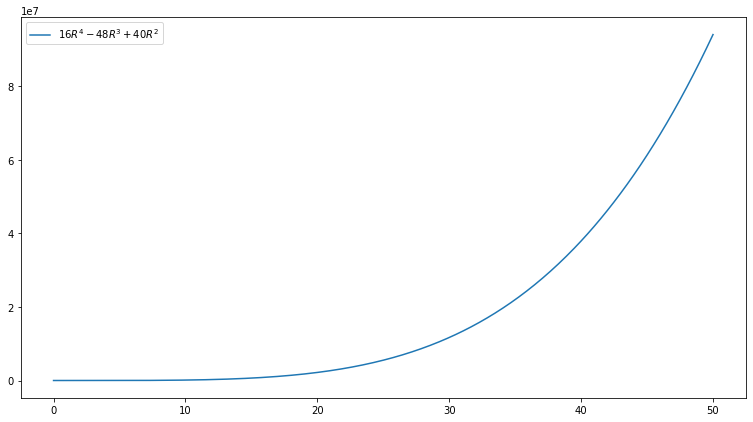

In [30]:
x=np.linspace(0,50.0,500)
plt.plot(x, 16*x**4-48*x**3+40*x**2, label="$16R^{4}-48R^{3}+40R^{2}$")
plt.legend()
plt.show()

La valeur de $f$ évaluée en $X_4^{*}$ est :

$$f(x_4^{*},y_4^{*})=R^{2}(R-2)^{2} \ ; \forall R > 0$$

Enfin, 

$$X_4^{*} \in \mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+}) \ ; \ \forall R>0$$

**3) Maximum global de $f$ dans $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$**

Etudions le signe de la différence entre $f(x_3^{*},y_3^{*})$ et $f(x_4^{*},y_4^{*})$ :

$$f(x_3^{*},y_3^{*})-f(x_4^{*},y_4^{*})=R^{2}(R+2)^{2}-R^{2}(R-2)^{2}=8R^{3} > 0 \ ; \ \forall R>0$$

Ainsi, le maximum global de $f$ dans $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$ est atteint en :

$$
(x^{*},y^{*})=\left\{
\begin{array}{ll}
    (1-R,\ 1) \ si \ R\leq 1 \\
    (R+1, \ 1) \ si \ R> 1
\end{array}
\right.
$$


- Si $R\leq 1$ la contrainte n'est jamais saturée et $(x^{*},y^{*})$ se trouve à l'intérieur de $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$

- Si $R=2$ la contrainte n'est pas saturée, ce qui implique que le point critique $(x^{*},y^{*})=(3,\ 1)$ se trouve à l'intérieur de $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$

- Si $R>1$ et $R \neq 2$ la contrainte peut-être saturée car $\lambda^{*} \neq 0$. Alors $(x^{*},y^{*})$ se trouve soit sur le bord de $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$, soit à l'intérieur de $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$. La contrainte est saturée si et seulement si :

$$
\begin{array}{ll}
    &(x^{*}-1)^{2} + (y^{*}-1)^{2} = R^{2} \\
    \iff &(R+1-1)^{2} + (1-1)^{2} = R^{2} \\
    \iff &R^{2}=R^{2}
\end{array}$$

Ainsi, si $R>1$ et $R \neq 2$ la contrainte est saturée et $(x^{*},y^{*})$ se trouve sur le bord de $\mathcal{D}_R \bigcap (\mathbb{R_+}\times \mathbb{R_+})$.

**Résumé**

**1) $R < 1$**

- Deux minimums locaux en $(1;\ 1-R)$ et $(1; \ 1+R)$
- Un point selle atteint en $(1;\ 1)$
- Un max global en $(1-R;\ 1)$
- Un max local en $(R+1; \ 1)$

**2) $R=1$**

- Deux minimums locaux en $(1;\ 0)$ et $(1; \ 2)$
- Un point selle atteint en $(1;\ 1)$
- Un max global en $(0;\ 1)$
- Un max local en $(2;\ 1)$

**3) $R \in ]1;2[$**

- Un min local en $(1; \ 0)$
- Un min global en $(1; \ 1+R)$
- Un point selle atteint en $(1;\ 1)$
- Un max local en $(R+1; \ 1)$
- Un max global en $(0;\ 1)$

**4) $R \in [2;3[$**

- Un min local en $(1; \ 0)$
- Un min global en $(1; \ 1+R)$
- Deux points selle atteints en $(1;\ 1)$ et $(3;\ 1)$
- Un max local en $(R+1; \ 1)$
- Un max global en $(0;\ 1)$

**4) $R \geq 3$**

- Un min local en $(1; \ 0)$
- Un min global en $(1; \ 1+R)$
- Deux points selle atteints en $(1;\ 1)$ et $(3;\ 1)$
- Un max global en $(R+1; \ 1)$
- Un max local en $(0;\ 1)$

**Représentation graphique**

In [31]:
##la fonction f
def f(x,y):
    return (x-3)**2*(x-1)**2-(y-1)**2

##La figure
def visu(R=1, step=0.5):
    assert R>0
    ##génération des courbes de niveaux
    fig,ax=plt.subplots(1,1)
    x=np.linspace(0,R+2, 101)
    y=np.linspace(0,R+2, 101)
    xx, yy = np.meshgrid(x,y)
    zz=f(xx,yy)
    plt.contour(xx, yy, zz,  np.arange(zz.min(), zz.max(), step))
    plt.colorbar()
    ##points critiques
    ##disque 
    t=np.linspace(-np.pi,np.pi)
    x=1+R*np.cos(t)
    y=1+R*np.sin(t)  
    ax.plot(x,y,lw=2,ls='-',color='black')       
    ##titre de la figure
    fonc='fonction : $f(x,y)=(x-3)^{2}(x-1)^{2}-(y-1)^{2}$'
    contrainte=f'contrainte : $(x-1)^{2}+(y-1)^{2}={R**2:0.2f}$' #contrainte : $(x-1)^{2}+(y-1)^{2}=R^{2}$'
    titre=fonc+'$\quad$' +contrainte
    ax.set_title(titre)
    ##limites 
    plt.xlim(0,R+2)
    plt.ylim(0,R+2)
    # les annotates
    ax.text(1, 1, 'Pt Scelle')
    ax.scatter(1,1,alpha=1,color='red')
    if R <= 1 :
        ax.text(1,1-R,"Min$_{loc}$")
        ax.scatter(1,1-R,alpha=1,color='red')
        ax.text(1,1+R,"Min$_{loc}$")
        ax.scatter(1,1+R,alpha=1,color='red')
        ax.text(1-R,1,"Max$_{glob}$")
        ax.scatter(1-R,1,alpha=1,color='red')
        ax.text(1+R,1,"Max$_{loc}$")
        ax.scatter(1+R,1,alpha=1,color='red')
    elif R > 1 and R < 2 :
        ax.text(2,1,"Max$_{loc}$")
        ax.scatter(2,1,color="red")
        ax.text(1,1+R,"Min$_{glob}$")
        ax.scatter(1,1+R,alpha=1,color='red')
        ax.text(1+R,1,"Max$_{loc}$")
        ax.scatter(1+R,1,alpha=1,color="red")
        ax.text(0,1,"Max$_{glob}$")
        ax.scatter(0,1,alpha=1,color="Green")
        ax.text(1,0,"Min$_{loc}$")
        ax.scatter(1,0,alpha=1,color='red')
    elif R >= 2 and R < 3:
        ax.text(2,1,"Max$_{loc}$")
        ax.scatter(2,1,color="red")
        ax.text(1,1+R,"Min$_{glob}$")
        ax.scatter(1,1+R,alpha=1,color='red')
        ax.text(1+R,1,"Max$_{loc}$")
        ax.scatter(1+R,1,alpha=1,color="red")
        ax.text(0,1,"Max$_{glob}$")
        ax.scatter(0,1,alpha=1,color="red")
        ax.text(1,0,"Min$_{loc}$")
        ax.scatter(1,0,alpha=1,color='red')
        ax.text(3,1,"Pt Scelle")
        ax.scatter(3,1,color="black")
    elif R == 3:
        ax.text(2,1,"Max$_{loc}$")
        ax.scatter(2,1,color="red")
        ax.text(1,1+R,"Min$_{glob}$")
        ax.scatter(1,1+R,alpha=1,color='red')
        ax.text(1+R,1,"Max$_{loc}$")
        ax.scatter(1+R,1,alpha=1,color="red")
        ax.text(0,1,"Max$_{loc}$")
        ax.scatter(0,1,alpha=1,color="red")
        ax.text(1,0,"Min$_{loc}$")
        ax.scatter(1,0,alpha=1,color='red')
        ax.text(3,1,"Pt Scelle")
        ax.scatter(3,1,fonction(3,1),color="red")
    elif R > 3:
        ax.text(2,1,"Max$_{loc}$")
        ax.scatter(2,1,color="red")
        ax.text(1,1+R,"Min$_{glob}$")
        ax.scatter(1,1+R,alpha=1,color='red')
        ax.text(1+R,1,"Max$_{glob}$")
        ax.scatter(1+R,1,alpha=1,color="red")
        ax.text(0,1,"Max$_{loc}$")
        ax.scatter(0,1,alpha=1,color="red")
        ax.text(1,0,"Min$_{loc}$")
        ax.scatter(1,0,alpha=1,color='red')
        ax.text(3,1,"Pt Scelle")
        ax.scatter(3,1,color="red")

In [32]:
##les widgets
Rwid=ipywidgets.FloatSlider(
    value=1,
    min=0.1, 
    max=5.0, 
    step=0.1,
    description=r'$R$:',
    orientation='horizontal')
stepwid=ipywidgets.FloatSlider(
    value=0.5,
    min=0.1, 
    max=3, 
    step=0.1,
    description=r'step:',
    orientation='horizontal')
ui = ipywidgets.HBox([Rwid, stepwid])
out=ipywidgets.interactive_output(visu, {'R': Rwid,
                                        'step': stepwid})
display(ui,out)

Output()